In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 利用全連結神經網路DNN做手寫辨識

In [17]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

#### 1. 讀入 MNSIT 數據集

In [19]:
from tensorflow.keras.datasets import mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()

#### 2. 資料整理

In [20]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#### 3. 打造神經網路

In [21]:
model = Sequential()

In [22]:
model.add(Dense(100, input_dim=784, activation='ELU'))

In [23]:
model.add(Dense(100, activation='ELU'))

In [24]:
model.add(Dense(10, activation='softmax'))

In [26]:
model.compile(loss='mse', optimizer=Adam(lr=0.01),
             metrics=['accuracy'])

/Users/peiyun/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0159 - accuracy: 0.8965
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0139 - accuracy: 0.9244
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0204 - accuracy: 0.8961
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0223 - accuracy: 0.8878
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0228 - accuracy: 0.8851
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0223 - accuracy: 0.8880
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0283 - accuracy: 0.8581
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0234 - accuracy: 0.8829
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0245 - accuracy: 0.8773
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0264 - accuracy: 0.8680

In [29]:
predict = model.predict(x_test)
predict = np.argmax(predict,axis=1)

313/313 [==============================] - 1s 2ms/step


神經網路預測是： 6


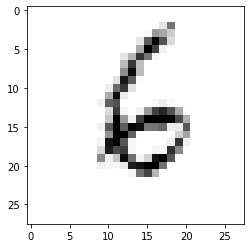

In [30]:
n = 2000

print('神經網路預測是：', predict[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys');

#### 讀入 Fasion 版的 MNIST

In [31]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [32]:
x_train = x_train.reshape(60000, 784)/255 
x_test = x_test.reshape(10000, 784)/255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [33]:
model = Sequential()

In [34]:
model.add(Dense(100, input_dim=784, activation='ReLU'))

In [35]:
model.add(Dense(100, activation='ReLU'))

In [36]:
model.add(Dense(10, activation='softmax'))

In [37]:
model.compile(loss='mse', optimizer=Adam(lr=0.01), 
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0291 - accuracy: 0.7937
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0221 - accuracy: 0.8476
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0208 - accuracy: 0.8571
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0201 - accuracy: 0.8626
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0194 - accuracy: 0.8681
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0192 - accuracy: 0.8690
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0187 - accuracy: 0.8720
Epoch 8/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0188 - accuracy: 0.8730
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0183 - accuracy: 0.8769
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0183 - accuracy: 0.8771

In [40]:
predict = model.predict(x_test)
predict = np.argmax(predict,axis=1)

313/313 [==============================] - 1s 2ms/step


神經網路預測是: shirt


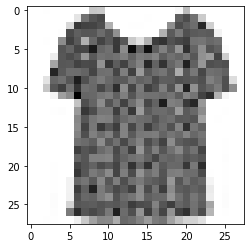

In [41]:
labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
           'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
           
n = 1000
k = predict[n]
print('神經網路預測是:', labels[k])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys');